# **DATA 311 UBCO, Logistic Regression implemented in Python**

## **Assignment 2, Logistic Classification:**

### **Logistic Model Implementation:**

In [83]:
##decleration & data first as always

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

df = pd.read_csv('myopiacomma.csv')
df.head(10)

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0
5,6,1995,0,6,0,1.744,22.14,3.224,3.556,15.36,10,6,2,1,19,44,0,1
6,7,1993,0,6,1,0.683,22.33,3.186,3.654,15.49,12,7,2,1,8,36,0,1
7,8,1991,0,6,1,1.272,22.39,3.732,3.584,15.08,12,0,0,0,8,8,0,0
8,9,1991,0,7,0,1.396,22.62,3.464,3.408,15.74,4,0,3,1,3,12,0,0
9,10,1991,0,6,1,0.972,22.74,3.504,3.696,15.54,30,5,1,0,10,27,0,0


In [ ]:
df.describe()

In [ ]:
df = df.dropna()

df.describe()

In [85]:
df['PARENTMY'] = (df['MOMMY'] | df['DADMY']).astype(int)

# df.head(10)

df.columns

Index(['ID', 'STUDYYEAR', 'MYOPIC', 'AGE', 'GENDER', 'SPHEQ', 'AL', 'ACD',
       'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR', 'STUDYHR', 'TVHR',
       'DIOPTERHR', 'MOMMY', 'DADMY', 'PARENTMY'],
      dtype='object')

### **Split into a training & testing as always:**

In [86]:
n = df.shape[0]
i = np.random.permutation(n)

train_size = round(0.6*n)
test_size = n - train_size

train = i[:train_size]
test = i[:test_size]

training_data = df.iloc[train]
testing_data = df.iloc[test]

training_data.columns

Index(['ID', 'STUDYYEAR', 'MYOPIC', 'AGE', 'GENDER', 'SPHEQ', 'AL', 'ACD',
       'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR', 'STUDYHR', 'TVHR',
       'DIOPTERHR', 'MOMMY', 'DADMY', 'PARENTMY'],
      dtype='object')

### **Now we fit the Logistic Regression:**

to do this think back to sm.OLS from part 1

    A regular Linear Model is made with sm.OLS(y, sm.add_constant(x)).fit()
    & the Logit Model we want here is made by sm.OLS(y, sm.add_constant(x)).fit()

In [87]:
x_train_1 = training_data[['SPHEQ', 'AL', 'ACD']]
y_train_1 = training_data['MYOPIC']
x_test_1 =  testing_data[['MYOPIC', 'SPHEQ', 'AL', 'ACD']]
y_test_1 =  testing_data['MYOPIC']

LogModel_1 = sm.Logit(y_train_1, sm.add_constant(x_train_1)).fit()

Optimization terminated successfully.
         Current function value: 0.245239
         Iterations 8


In [88]:
x_train_2 = training_data[['SPHEQ', 'AL', 'ACD', 'PARENTMY']]
y_train_2 = training_data['MYOPIC']
x_test_2 =  testing_data[['MYOPIC', 'SPHEQ', 'AL', 'ACD', 'PARENTMY']]
y_test_2 =  testing_data['MYOPIC']

LogModel_2 = sm.Logit(y_train_2, sm.add_constant(x_train_2)).fit()

Optimization terminated successfully.
         Current function value: 0.231199
         Iterations 9


In [89]:
x_train_3 = training_data[['SPHEQ', 'AL', 'ACD', 'PARENTMY', 'READHR', 'COMPHR', 'TVHR']]
y_train_3 = training_data['MYOPIC']
x_test_3 =  testing_data[['MYOPIC', 'SPHEQ', 'AL', 'ACD', 'PARENTMY', 'READHR', 'COMPHR', 'TVHR']]
y_test_3 =  testing_data['MYOPIC']

LogModel_3 = sm.Logit(y_train_3, sm.add_constant(x_train_3)).fit()

Optimization terminated successfully.
         Current function value: 0.228954
         Iterations 9


### **Things to do with the Logistic Regression Model Objects:**

    use LogitModel.summary() or LogitModel.summary2() for a summary

In [90]:
LogModel_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: MYOPIC           Pseudo R-squared: 0.306     
Date:               2024-01-01 17:33 AIC:              189.9670  
No. Observations:   371              BIC:              205.6318  
Df Model:           3                Log-Likelihood:   -90.984   
Df Residuals:       367              LL-Null:          -131.03   
Converged:          1.0000           LLR p-value:      2.9436e-17
No. Iterations:     8.0000           Scale:            1.0000    
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     12.4642     6.8010    1.8327   0.0668   -0.8655   25.7939
SPHEQ     -3.9912     0.5742   -6.9507   0.0000   -5.1167   -2.8658
AL        -0.6272     0.3242   -1.9347   0.0530   -1.2626    0.0082
ACD        0.4503     1.0072    0.4471   0.6548   -1.5238    2.4244
=================================================================

"""

    or use LogitModel.params to gather the coefficients directly

In [91]:
# LogModel_1.params

print(LogModel_1.params, "\n\n", LogModel_2.params, "\n\n", LogModel_3.params)

const    12.464193
SPHEQ    -3.991214
AL       -0.627187
ACD       0.450284
dtype: float64 

 const       10.456819
SPHEQ       -3.856998
AL          -0.637601
ACD          0.462163
PARENTMY     2.399984
dtype: float64 

 const       10.960577
SPHEQ       -3.947797
AL          -0.622817
ACD          0.357377
PARENTMY     2.386583
READHR      -0.014627
COMPHR       0.020626
TVHR        -0.047219
dtype: float64


### **Time to find the accuracy:**

    this time we will use the confusion matrix instead of just an accuracy stat
    you do this by first predicting using Predictions = Model.predict(x_test_data)
    & after prediction you use ConfusionMatrix = confusion_matrix(y_test_data, Predictions)

In [92]:
pred1 = LogModel_1.predict(x_test_1)
y1 = (pred1 >= 0.5).astype(int)
cm1 = confusion_matrix(y_test_1, y1)
cm1

array([[220,   0],
       [ 20,   7]], dtype=int64)

In [93]:
pred2 = LogModel_2.predict(x_test_2)
y2 = (pred2 >= 0.5).astype(int)
cm2 = confusion_matrix(y_test_2, y2)
cm2

array([[220,   0],
       [ 18,   9]], dtype=int64)

In [94]:
pred3 = LogModel_3.predict(x_test_3)
y3 = (pred3 >= 0.5).astype(int)
cm3 = confusion_matrix(y_test_3, y3)
cm3

array([[220,   0],
       [ 19,   8]], dtype=int64)

### **And we plot once more:**

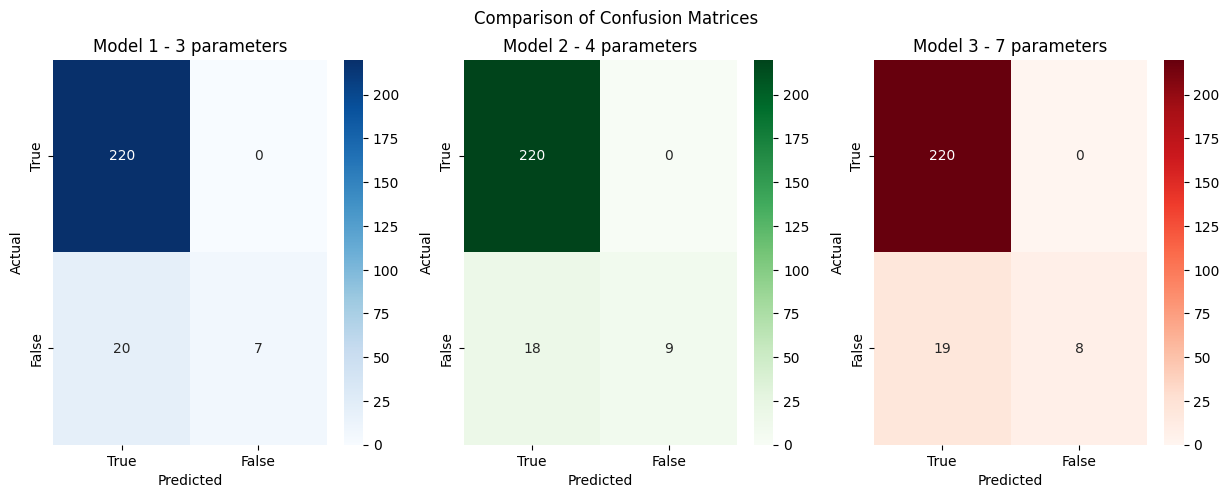

In [95]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=axes[0], xticklabels=['True', 'False'], yticklabels=['True', 'False'])
axes[0].set_title('Model 1 - 3 parameters'); axes[0].set_xlabel('Predicted'); axes[0].set_ylabel('Actual')

sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', ax=axes[1], xticklabels=['True', 'False'], yticklabels=['True', 'False'])
axes[1].set_title('Model 2 - 4 parameters'); axes[1].set_xlabel('Predicted'); axes[1].set_ylabel('Actual')

sns.heatmap(cm3, annot=True, fmt='d', cmap='Reds', ax=axes[2], xticklabels=['True', 'False'], yticklabels=['True', 'False'])
axes[2].set_title('Model 3 - 7 parameters'); axes[2].set_xlabel('Predicted'); axes[2].set_ylabel('Actual')

fig.suptitle('Comparison of Confusion Matrices')
plt.show()


|                  | Predicted True  | Predicted False |
|:---:             |:---:            |:---:            |
| **Actual True**  | True Positive   | False Negative  |
| **Actual False** | False Positive  | False Positive  |

### **Finally, lets find the LogLoss:**

In [100]:
y_pred_test_1 = LogModel_1.predict(x_test_1); loss_1 = log_loss(y_test_1, y_pred_test_1)
y_pred_test_2 = LogModel_2.predict(x_test_2); loss_2 = log_loss(y_test_2, y_pred_test_2)
y_pred_test_3 = LogModel_3.predict(x_test_3); loss_3 = log_loss(y_test_3, y_pred_test_3)

print("LogLoss for 3 parameters: ", loss_1, "\t\t LogLoss for 4 parameters: ", loss_2, "\t\t LogLoss for 7 parameters: ", loss_3)

LogLoss for 3 parameters:  0.17420652441362622 		 LogLoss for 4 parameters:  0.1647126082959413 		 LogLoss for 7 parameters:  0.16306416222645392


### **Oh don't forget to plot:**

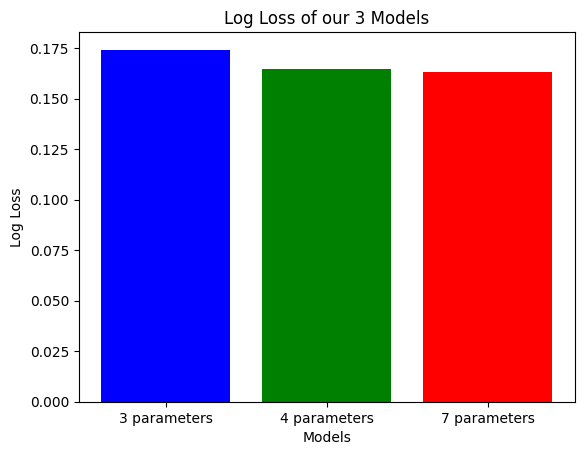

In [104]:
log_losses = [loss_1, loss_2, loss_3]
models = ['3 parameters', '4 parameters', '7 parameters']

plt.bar(models, log_losses, color=['blue', 'green', 'red'])
plt.xlabel('Models'); plt.ylabel('Log Loss'); plt.title('Log Loss of our 3 Models'); plt.show()

### **Next Notebooks: CART trees and Random Forests**